### Problem Statement
A car company aims to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the market they are familiar with. The company wants to know:

- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market.

### Business Goal

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Attribute Information:
1) Car_ID: Unique id of each observation (Integer)
2) Symboling: Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. (Categorical)
3) carCompany: Name of a car company (Categorical)
4) fueltype: Car fuel type i.e gas or diesel (Categorical)
5) aspiration: Aspiration used in a car (Categorical)
6) doornumber: Number of doors in a car (Categorical)
7) carbody: the body of the car (Categorical)
8) drivewheel: type of drive wheel (Categorical)
9) enginelocation: Location of a car engine (Categorical) 10)wheelbase: Wheelbase of a car (Numeric)
11) carlength: Length of the car (Numeric)
12) carwidth: Width of the car (Numeric)
13) carheight: height of car (Numeric)
14) curbweight: The weight of a car without occupants or baggage. (Numeric)
15) enginetype: Type of engine. (Categorical)
16) cylindernumber: cylinder placed in the car (Categorical)
17) enginesize: Size of the car (Numeric)
18) fuelsystem: Fuel system of car (Categorical)
19) boreratio: Boreratio of a car (Numeric)
20) stroke: Stroke or volume inside the engine (Numeric)
21) compressionratio: compression ratio of a car (Numeric)
22) horsepower: Horsepower (Numeric)
23) peakrpm: car peak rpm (Numeric)
24) citympg: Mileage in the city (Numeric)
25) highwaympg: Mileage on highway (Numeric)
26) price: Price of the car (Numeric)(Dependent variable)

Importing necessary packages and functions required

In [190]:
import numpy as np # for numerical computations
import pandas as pd # for data processing,I/O file operations
import matplotlib.pyplot as plt # for visualization of different kinds of plots

for matplotlib graphs to be included in the notebook, next to the code

In [191]:
import seaborn as sns # for visualization
from IPython.display import Image, display
import warnings # to silence warnings
warnings.filterwarnings('ignore')

import all libraries and dependencies for machine learning

In [192]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor  # Import Decision Tree Regressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
import plotly.express as px

### Step 1: Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [193]:
car_data = pd.read_csv("CarPrice.csv")
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Understanding the shape of the data frame

In [194]:
car_data.shape

(205, 26)

This shows that there are 205 rows, 26 columns in the data.

In [195]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Summary statistics of data set

In [196]:
car_data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Step 2: Cleaning the Data and Preparation

#### What is Data Cleaning ? :
Information appears in diverse formats, with the majority of it being disorganized and not structured. They are seldom readily usable. Regardless of their size, data sets are often problematic, with issues such as inaccurate fields, lacking or extra values, and values that are not in the format we need. To make it functional or structured, we must "clean" our data, and prepare it for use. Standard cleaning processes include parsing, converting to one-hot encoding, eliminating irrelevant data, and so on.

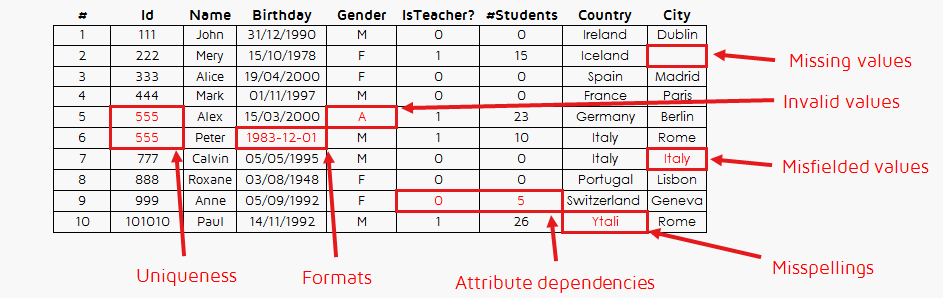

In [197]:
display(Image(filename='cleanvsuncleandata.png', width=800))

We need to do some basic cleansing activity in order to feed our model the correct data.

 percentage of missing values in each column

In [198]:
round(car_data.isnull().sum()/len(car_data.index), 2)*100

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

the data at hand is clean of any missing values.

Dropping car_ID as it is just for reference and is of no use.

In [199]:
car_data = car_data.drop('car_ID',axis=1)

Stripping off spaces(if any)

In [200]:
car_data.columns = car_data.columns.str.strip(' ')
car_data.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [201]:
car_data.shape

(205, 25)

Creating a function to remove single value unique columns from the 'car_data' dataframe (if any)

In [202]:
def cols_single_val_remove(df):
    df_copy = df.copy()
    unisvcol = df_copy.nunique() == 1
    list_unisvcol = list(unisvcol[unisvcol.values==True].index)
    df_copy.drop(list_unisvcol, axis=1, inplace=True)
    return df_copy

In [203]:
car_data = cols_single_val_remove(df=car_data)
car_data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [204]:
car_data.shape

(205, 25)

The categorical variable CarName is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'. For example, chevrolet impala has 'chevrolet' as the car company name and 'impala' as the car model name. We need to consider only company name as the independent variable for model building.

In [205]:
car_data['car_company'] = car_data['CarName'].apply(lambda x: x.split( )[0])
car_data.drop('CarName',axis=1,inplace=True)
car_data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [206]:
car_data['car_company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Making sure that the unique entries are consistent. Fixing spelling mistakes in 'companyname' column
(1) 'maxda' = 'mazda'
(2) 'porcshce'= 'porsche'
(3) 'toyouta' = 'toyota'
(4) 'vokswagen' = 'volkswagen'
(5) 'vw' = 'volkswagen'
(6) 'alfa-romero' = 'alfa-romeo'

In [207]:
# Correcting the misspelled company names.
car_data['car_company'].replace('maxda','mazda',inplace=True)
car_data['car_company'].replace('Nissan','nissan',inplace=True)
car_data['car_company'].replace('porcshce','porsche',inplace=True)
car_data['car_company'].replace('toyouta','toyota',inplace=True)
car_data['car_company'].replace(['vokswagen','vw'],'volkswagen',inplace=True)
car_data['car_company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

Number of unique car companies:  22

The variable called symboling is a categorical one that has been treated as a numerical int64 type. We need to change the symboling variable. symboling is used to assign an insurance risk rating to a vehicle. A rating of +3 indicates that the automobile is hazardous, whereas a rating of -3 indicates that it is relatively safe. We should clarify the category by categorizing it based on risk. Here is the categorization:
-   symboling values of -2 and -1 will be classified as **safe**.
-   symboling values of 0 and 1 will be classified as **moderate**
-   symboling values of 2 and 3 will be classified as **risky**

In [208]:
car_data['symboling'] = car_data['symboling'].map({-2: 'safe',-1: 'safe',0: 'moderate',1: 'moderate',2: 'risky',3:'risky'})

In [209]:
#Checking for duplicates
car_data.loc[car_data.duplicated()]

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company


### Step 3: Visualising the data

<b>Visualising Dependent Variable: 'price'</b>

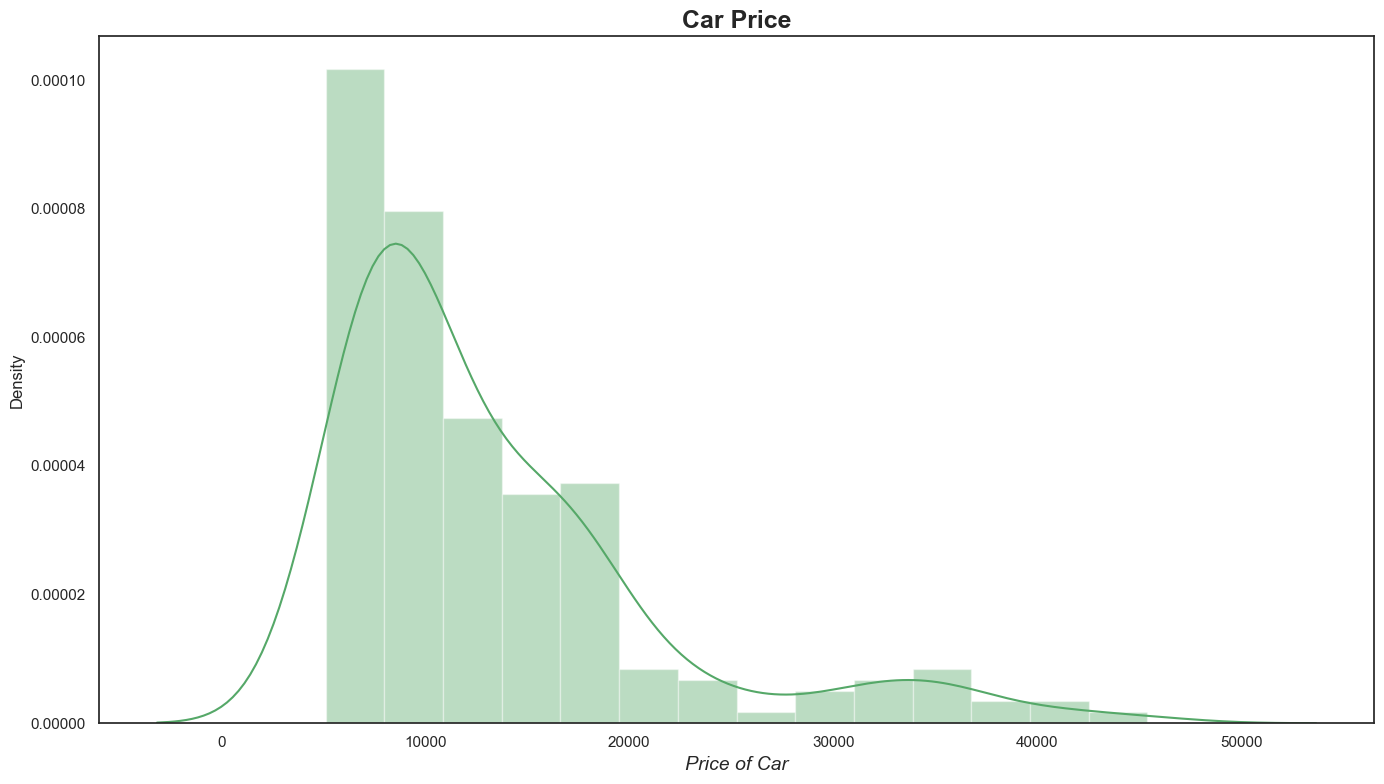

In [210]:
##Visualising our dependent/target variable 'price' data using a distplot
plt.figure(figsize=(14,8), dpi=100)
plt.title('Car Price', fontweight='bold', fontsize=18)
sns.distplot(car_data['price'], color='g')
plt.xlabel('Price of Car', fontstyle='italic', fontsize=14)
plt.tight_layout()
plt.autoscale()
plt.show()

In [211]:
##Checking car 'price' boxplot percentiles (distribution)
round(car_data.price.describe(percentiles = [0.25,0.5,0.75,0.85,0.90,1]))

count      205.0
mean     13277.0
std       7989.0
min       5118.0
25%       7788.0
50%      10295.0
75%      16503.0
85%      18500.0
90%      22563.0
100%     45400.0
max      45400.0
Name: price, dtype: float64

**Analysis:** <br>
(1) The plot for car prices is skewed to the right, indicating that a significant portion of the data has lower values than the rest of the dataset. <br>
(2) The mean and median values of car prices are significantly different (13,277 and 10,295 respectively), indicating that there may be some sampling variability in the car prices data.<br>
(3) Based on the box plot and percentile information, it can be inferred that:
- 50% of car prices are below (10,295).
- 75% of car prices are below (16,503).
- 85% of car prices are below (18,500).
- 90% of car prices are below (22,563).
- The remaining 10% of car prices fall between (22,563 and 45,400).

### Data Analysis

#### Data Understanding and Correction

Visualising the Data

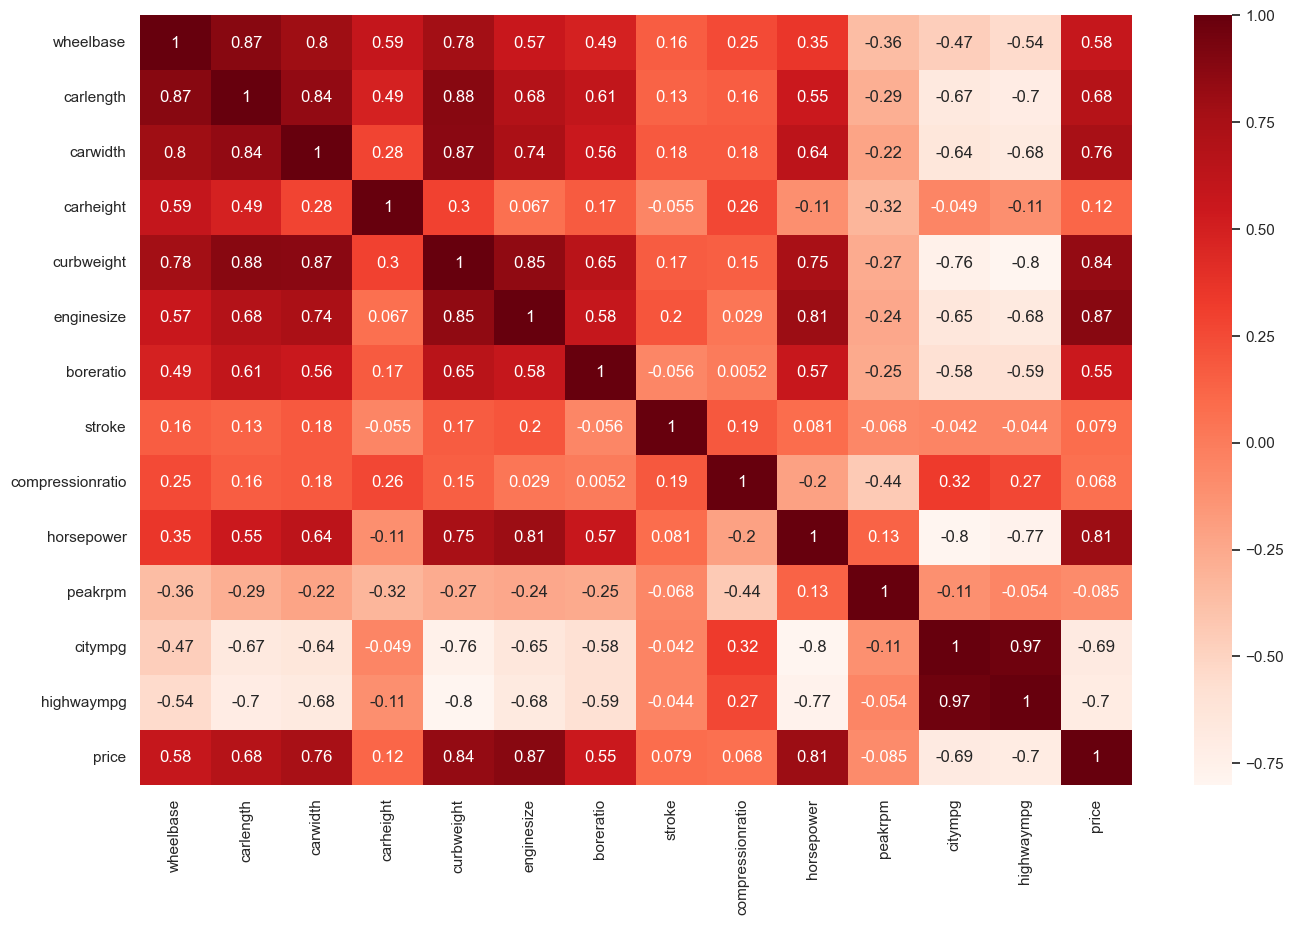

In [212]:
plt.figure(figsize = (16, 10))
cor=car_data.corr()
sns.heatmap(cor, annot = True, cmap="Reds")
plt.show()

<p>By analyzing the data, we can obtain a general understanding of which features are linked to the price of a car. We can observe that several features exhibit a positive correlation with the dependent variable of price, including:</p>
<ul>
    <li>wheelbase</li>
    <li>carlength</li>
    <li>carwidth</li>
    <li>curbweight</li>
    <li>enginesize</li>
    <li>boreratio</li>
    <li>horsepower</li>
</ul>
<p>On the other hand, some variables have a negative association with the price variable, such as:</p>
<ul>
    <li>citympg</li>
    <li>highwaympg</li>
</ul>

<div>
<p>We will continue to investigate these relationships between the variables. As of now, we have identified some significant multicollinearity between predictor variables. Specifically, we have observed:</p>
<ul>
    <li>Carlength has a clear correlation with wheelbase, carwidth, and curbweight.</li>
    <li>Curbweight is correlated with enginesize, carlength, carwidth, and wheelbase.</li>
    <li>Enginesize is correlated with horsepower, curbweight, and the dimensions of the car.</li>
    <li>Highway and city mpg's are highly correlated with a Pearson r coefficient of 0.97. We may choose to drop one of these variables.</li>
</ul>
<p> Additionally, we have also noted some negative correlations among variables:</p>
<ul>
    <li>Curbweight and horsepower have a negative correlation with highway/city mpg's.</li>
</ul>
</div>

<b>Step 3.1: Visualising Categorical Variables</b>

In [213]:
car_data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
0,risky,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,risky,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,moderate,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,risky,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,risky,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [214]:
categorical_variables = list(car_data.columns[car_data.dtypes == 'object'])
categorical_variables

['symboling',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'car_company']

In [215]:
##Defining a function for understanding the unique values and counts of categorical variable columns in 'car_data' dataframe
def unique_vals(df, categorical_variables):
    for var in categorical_variables:
        unique_vals = df[var].unique()
        num_unique_vals = df[var].nunique()
        print(f"Unique values of {var}: {unique_vals}\nNumber of unique items in {var}: {num_unique_vals}\n")
#List of categorical columns
unique_vals(df= car_data.copy(), categorical_variables=categorical_variables)

Unique values of symboling: ['risky' 'moderate' 'safe']
Number of unique items in symboling: 3

Unique values of fueltype: ['gas' 'diesel']
Number of unique items in fueltype: 2

Unique values of aspiration: ['std' 'turbo']
Number of unique items in aspiration: 2

Unique values of doornumber: ['two' 'four']
Number of unique items in doornumber: 2

Unique values of carbody: ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
Number of unique items in carbody: 5

Unique values of drivewheel: ['rwd' 'fwd' '4wd']
Number of unique items in drivewheel: 3

Unique values of enginelocation: ['front' 'rear']
Number of unique items in enginelocation: 2

Unique values of enginetype: ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
Number of unique items in enginetype: 7

Unique values of cylindernumber: ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
Number of unique items in cylindernumber: 7

Unique values of fuelsystem: ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
Number of un

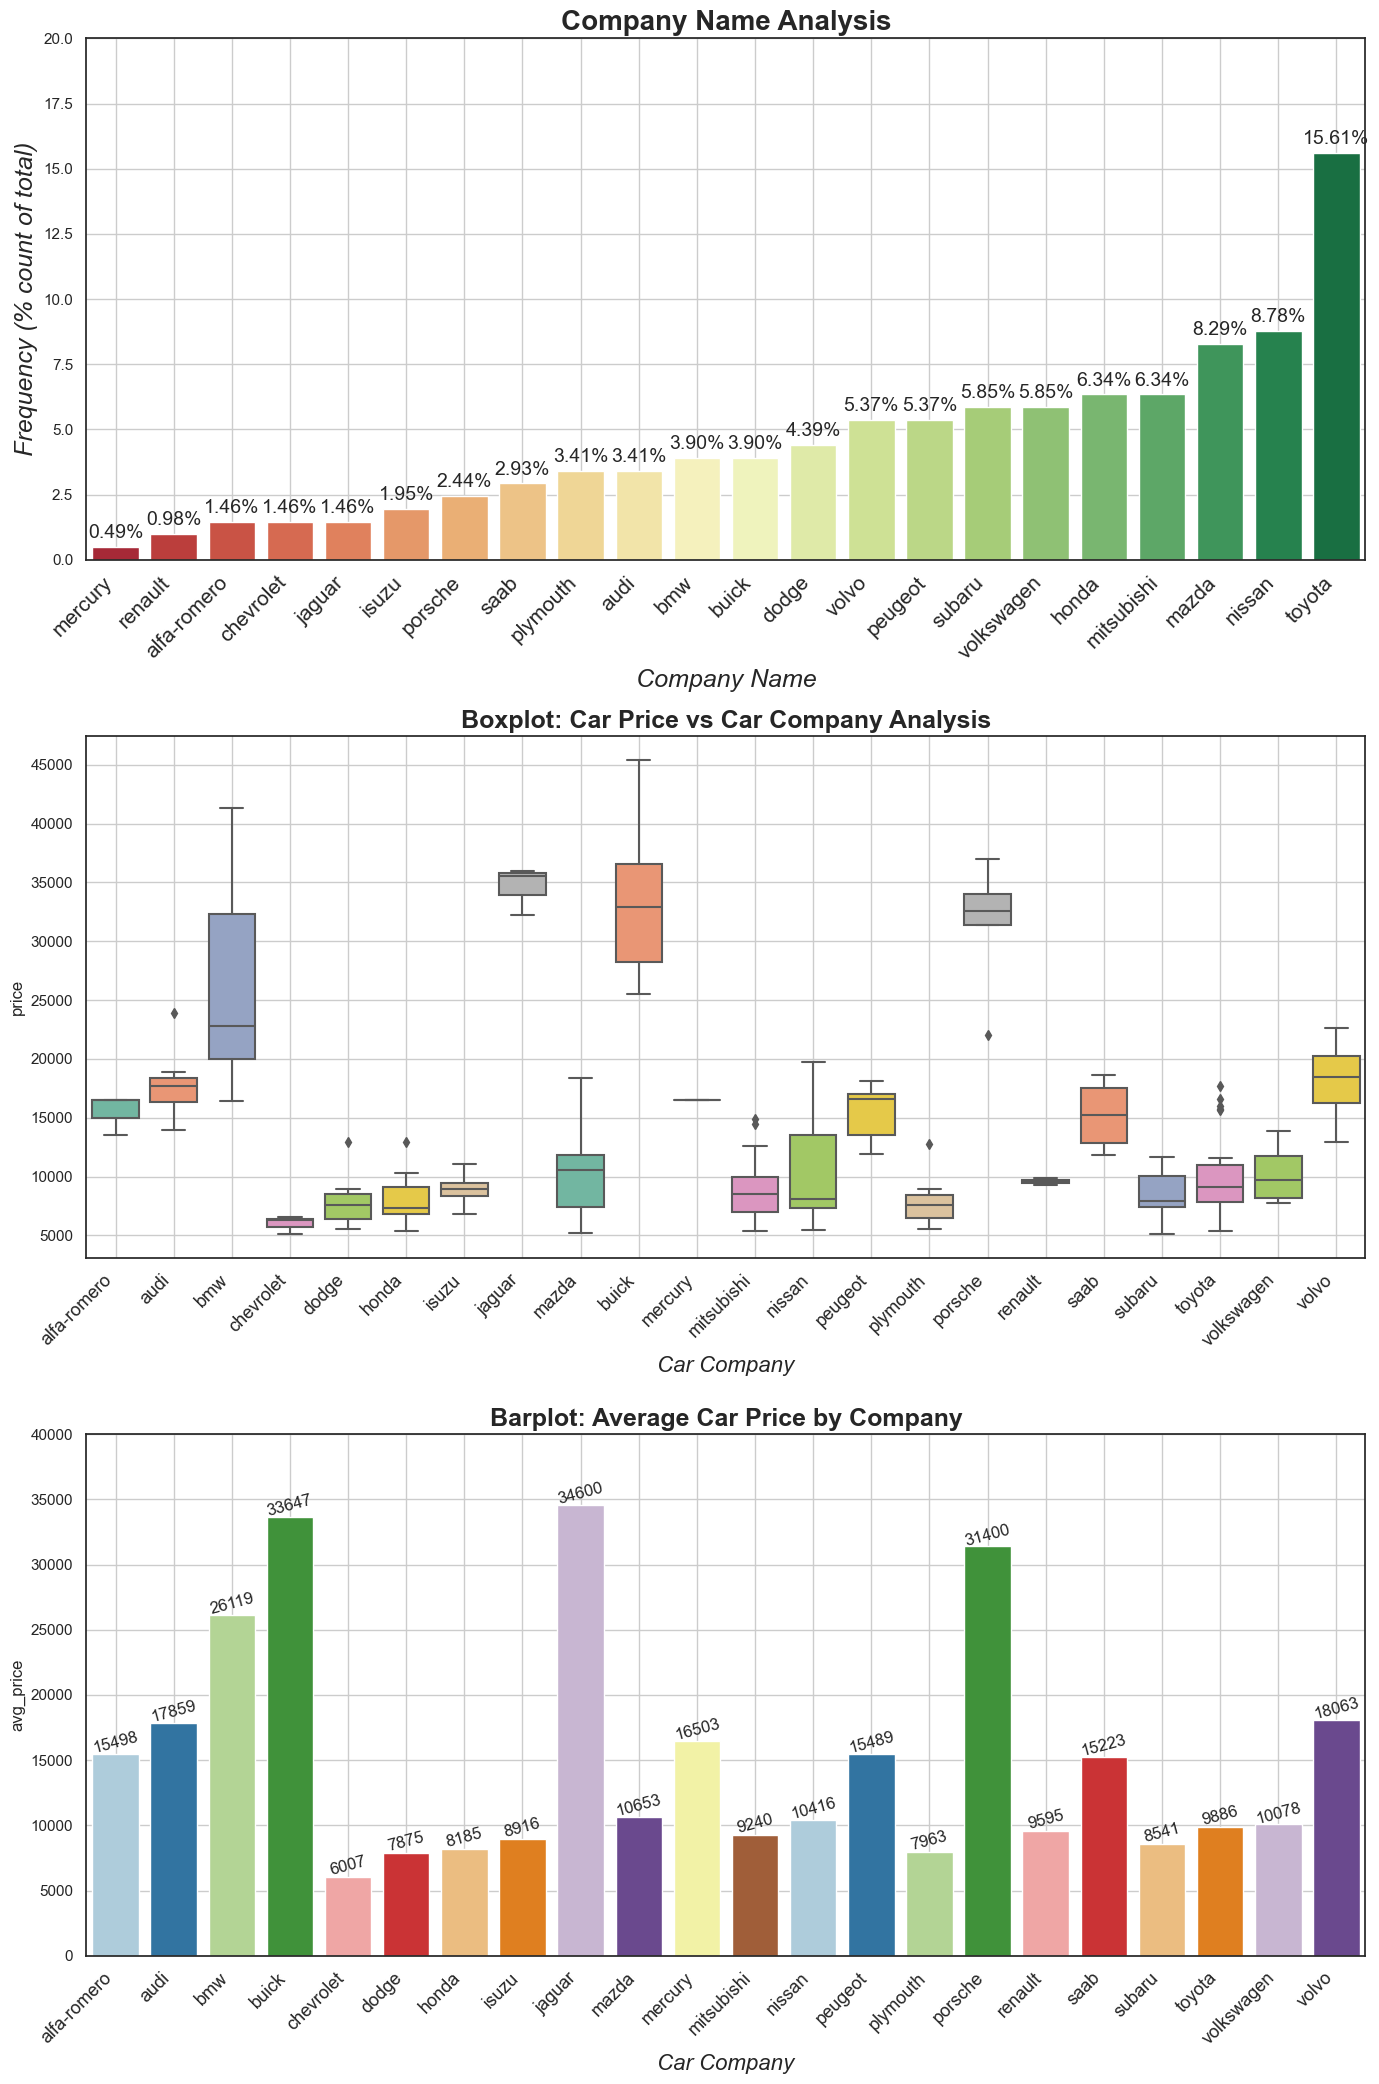

Average US car price:  13276.710570731706
car_company
jaguar     34600.000000
buick      33647.000000
porsche    31400.500000
bmw        26118.750000
volvo      18063.181818
Name: price, dtype: float64


In [216]:
# Set style for seaborn plots
sns.set(style='white')

# Create figure with 3 subplots
fig, axs = plt.subplots(3, 1, figsize=(14, 21), dpi=100)

# Barplot of car company frequency
cn = car_data.car_company.value_counts(normalize=True).mul(100).round(2).sort_values().reset_index()
sns.barplot(x='index', y='car_company', data=cn, palette='RdYlGn', ax=axs[0])
axs[0].set_xlabel('Company Name', fontsize=18, fontstyle='italic')
axs[0].set_ylabel('Frequency (% count of total)', fontsize=18, fontstyle='italic')
axs[0].set_title('Company Name Analysis', fontsize=20, fontweight='bold')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=15)
axs[0].set_ylim(0, 20)
axs[0].grid(True)
for i in axs[0].patches:
    axs[0].annotate(f"{i.get_height():.2f}%",
                    (i.get_x() + i.get_width() / 2., i.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=14)

# Boxplot of car price by company
sns.boxplot(x='car_company', y='price', data=car_data, palette='Set2', ax=axs[1])
axs[1].set_title('Boxplot: Car Price vs Car Company Analysis', fontsize=18, fontweight='bold')
axs[1].set_xlabel('Car Company', fontsize=16, fontstyle='italic')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=13)
axs[1].grid(True)

# Barplot of average car price by company
avg1 = pd.DataFrame(car_data.groupby('car_company')['price'].mean().round().to_frame('avg_price'))
avg1.reset_index(inplace=True)
sns.barplot(x='car_company', y='avg_price', data=avg1, palette='Paired', ax=axs[2])
axs[2].set_title('Barplot: Average Car Price by Company', fontsize=18, fontweight='bold')
axs[2].set_xlabel('Car Company', fontsize=16, fontstyle='italic')
axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=13)
axs[2].set_ylim(0, 40000)
axs[2].grid(True)
for i in axs[2].patches:
    axs[2].annotate(f"{i.get_height():.0f}",
                    (i.get_x() + i.get_width() / 2., i.get_height()),
                    ha='center', va='center', xytext=(0, 8), textcoords='offset points', fontsize=12, rotation=15)

# Set layout and show plot
plt.tight_layout()
plt.show()

# Print average US car price and top car companies by price
print('Average US car price: ', car_data['price'].mean())
print(car_data.groupby('car_company').price.mean().sort_values(ascending=False).head())

<div>
    <h3>Analysis:</h3>
    <ul>
        <li>The US automobile market is dominated by Toyota, which holds a 15.61% market share. Other significant players include Nissan with 8.78% and Mazda with 8.29%. Mitsubishi and Honda both hold 6.34% market share, making them equally popular.</li>
        <li>Each car manufacturer has a specific pricing range, with a few outliers producing high-end cars that are priced above their usual range. Brands such as Jaguar, Buick, Porsche, BMW, and Volvo are on the higher end of the spectrum, with prices well above the US average car price of approximately $13,000.</li>
        <li>It is apparent that the name of the company has an impact on the determination of car prices.</li>
    </ul>
</div>

In [217]:
def showLabels(ax, d=None):
    ## show labels in bar plots
    plt.margins(0.2, 0.2)
    rects = ax.patches
    locs, labels = plt.xticks()
    counts = {}
    if d:
        counts = {str(key): value for key, value in d.items()}

    for rect in rects:
        x_value = rect.get_x() + rect.get_width() / 2
        y_value = rect.get_height()

        if y_value < 0:
            space = -5
            va = 'top'
        else:
            space = 5
            va = 'bottom'

        if d:
            try:
                label = "{:.1f}%\nof {}".format(y_value, counts[str(labels[rect.get_x()])])
            except KeyError:
                label = "{:.1f}%".format(y_value)
        else:
            label = "{:.1f}%".format(y_value)

        plt.annotate(
            label,
            xy=(x_value, y_value),
            xytext=(0, space),
            textcoords="offset points",
            ha='center',
            va=va
        )

In [218]:
def plot_percentages(dataframe, var_list, sortbyindex=False):
    # Plot the percentage of cars in the US market with respect to different car features.
    plt.figure(figsize=(20, 17))
    for i, var in enumerate(var_list):
        plt.subplot(3, 4, i+1)

        # Get the values to plot and sort them if necessary
        values = (dataframe[var].value_counts(normalize=True) * 100)
        if sortbyindex:
            values = values.sort_index()

        # Plot the values and add labels
        ax = sns.barplot(x=values.index, y=values.values, palette='deep')
        if i%4==0:
            ax.set_ylabel('% in dataset', fontsize=16)
        else:
            ax.set_ylabel('', fontsize=16)
        ax.set_xlabel(var, fontsize=10)
        showLabels(ax)

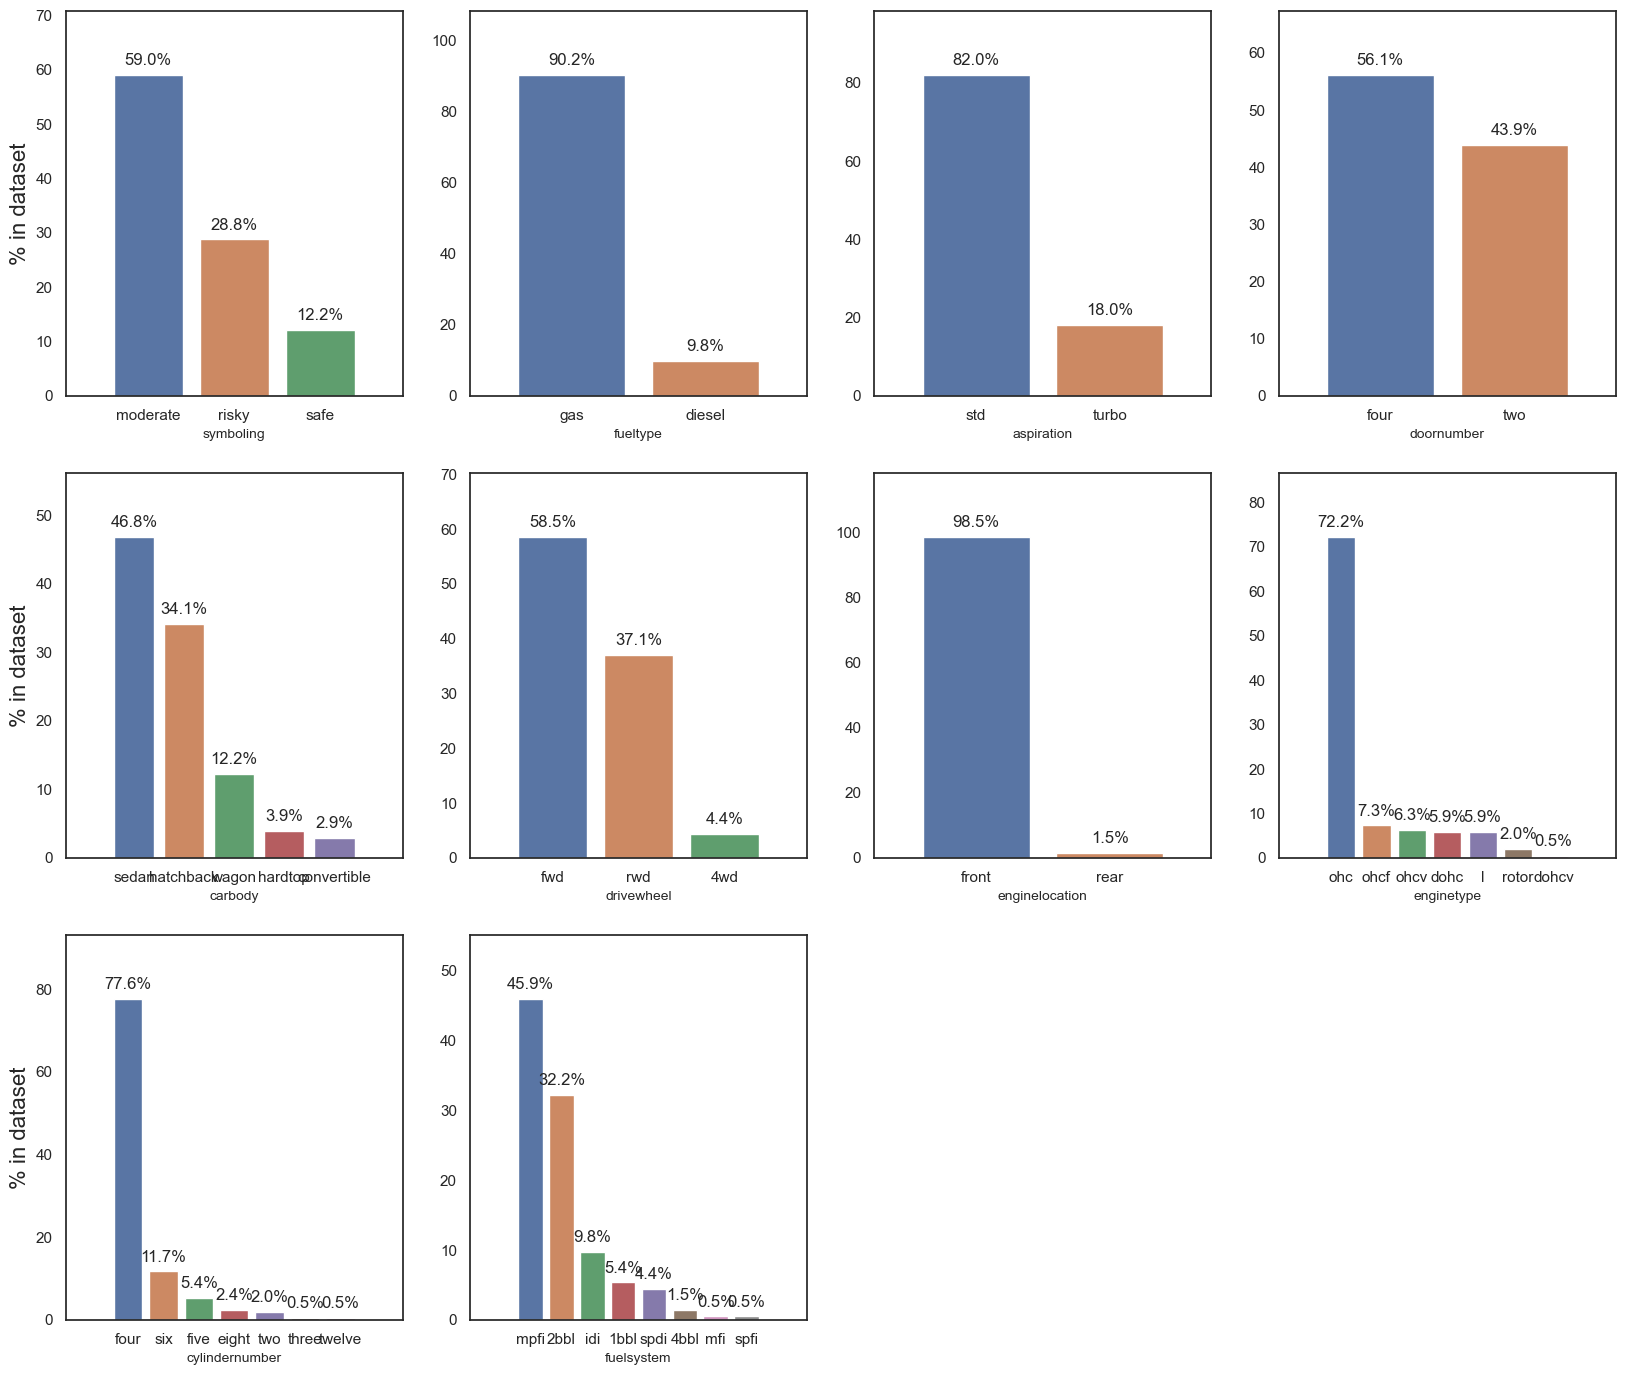

In [219]:
# market percentage of car's with respect to features
plot_percentages(car_data,categorical_variables[:-1])

We can identify some of the car <strong>features that are predominant</strong> in the US Automobile Market, The Company  can consider these facts to fulfill the market dominant needs and make the needed changes to their manufacturing line. These features are:

<ul>
<li><strong>symboling:</strong> moderate (0,1)</li>
<li><strong>fueltype:</strong> gas</li>
<li><strong>aspiration:</strong> standard</li>
<li><strong>doornumbers:</strong> four</li>
<li><strong>Carbody:</strong> Sedan</li>
<li><strong>drivewheel:</strong> forward</li>
<li><strong>engine location:</strong> front</li>
<li><strong>engine type:</strong> ohc</li>
<li><strong>cylinderNumber:</strong> four</li>
<li><strong>fuelSystem:</strong> mpfi</li>
</ul>

Let's see how these categorical variables relate one-to-one with the outcome variable price.

In [220]:
def plot_categorical_variables(var_list):
    #Function to plot a list of categorical variables together
    plt.figure(figsize=(20, 15))
    for i, var in enumerate(var_list):
        plt.subplot(3,4,var_list.index(var)+1)
        sns.boxplot(x = var, y = 'price', data = car_data)
        if i%4!=0:
            plt.ylabel('')
    plt.show()

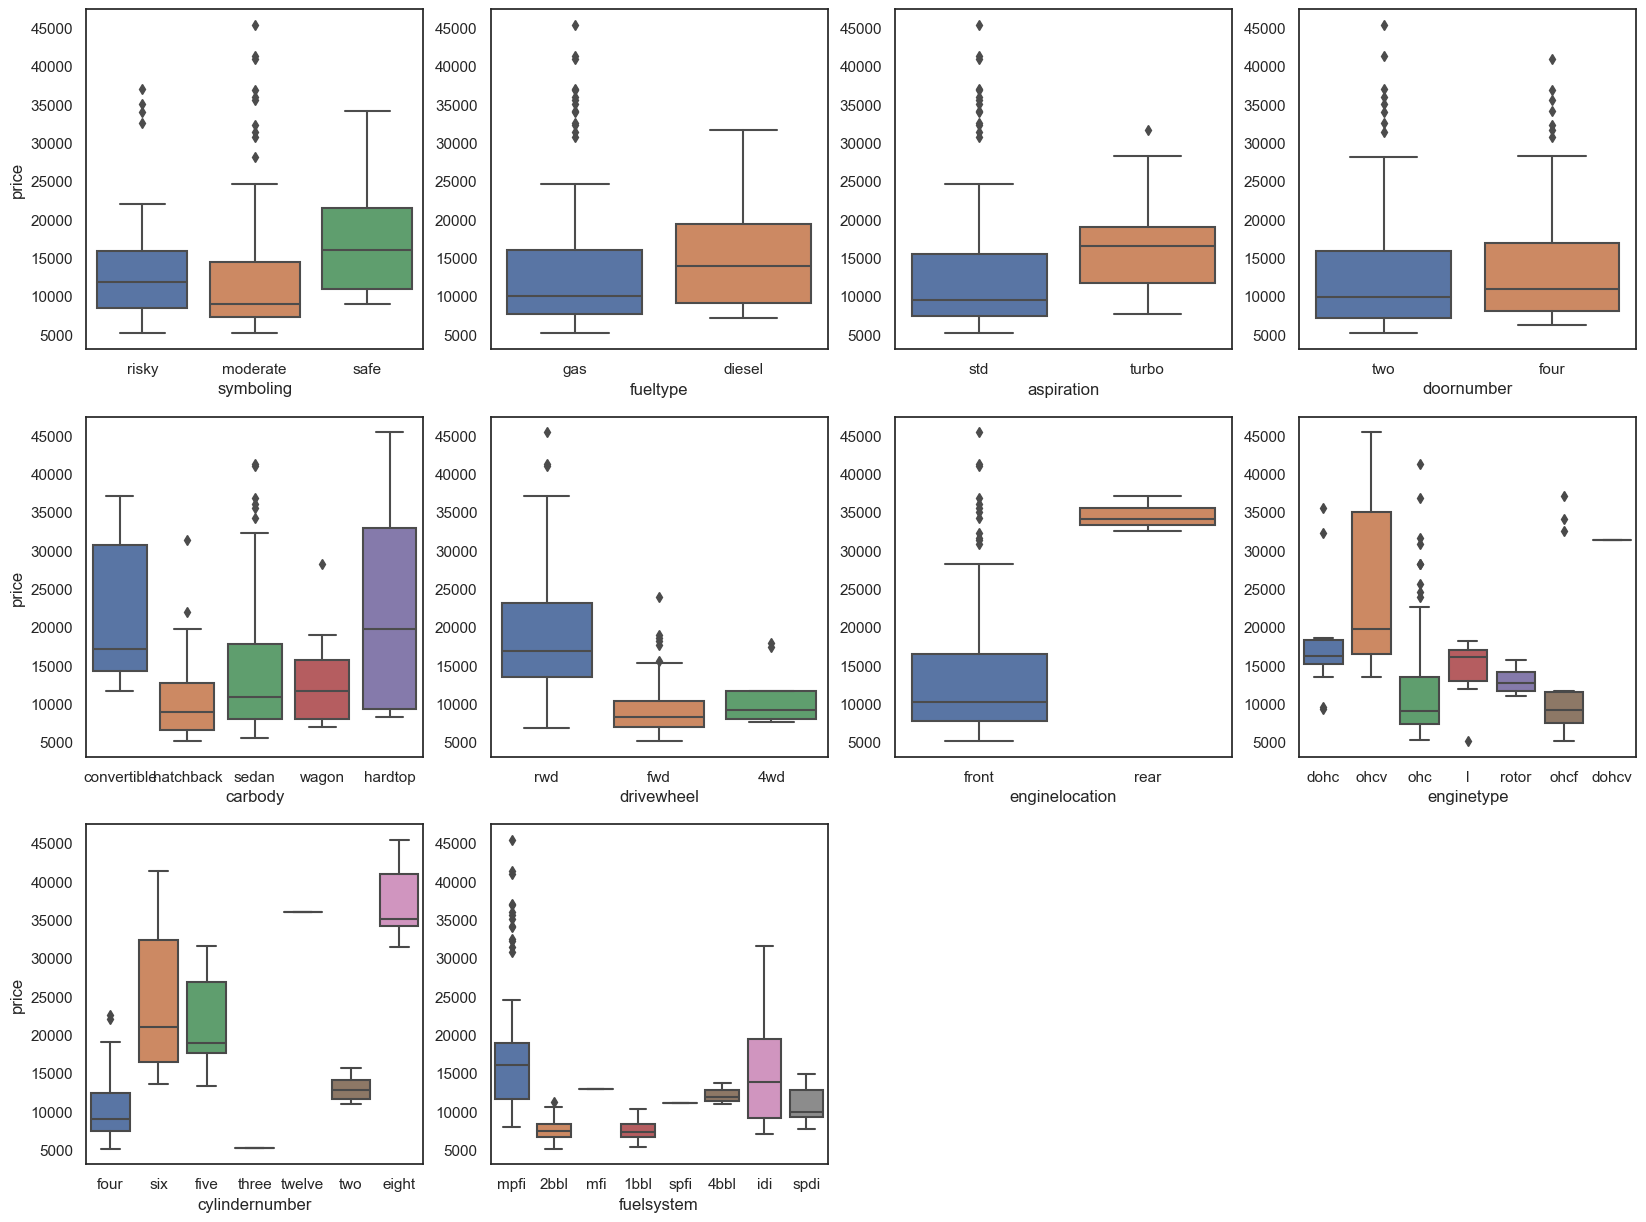

In [221]:
# ploting all variables excluding car_company against the output variable
plot_categorical_variables(categorical_variables[:-1])

<div>
<h3>Analysis:</h3>
<ul>
<li>The fuel type appears to have a subtle influence on car pricing, although not statistically significant. Further confirmation is necessary.</li>
<li>Enginelocation and aspiration are factors that noticeably impact car pricing.</li>
<li>Real wheel drive is notably more expensive than other drivewheel options.</li>
<li>The price of cars appears to be regulated by cylindernumber and engine type.</li>
<li>Cars with hardtop and convertible body types are unquestionably priced higher than other options. This indicates that car body type is a contributing factor in determining the price.</li>
</ul>
</div>

We can also see how multiple categorical variables together affect the pricing of cars.

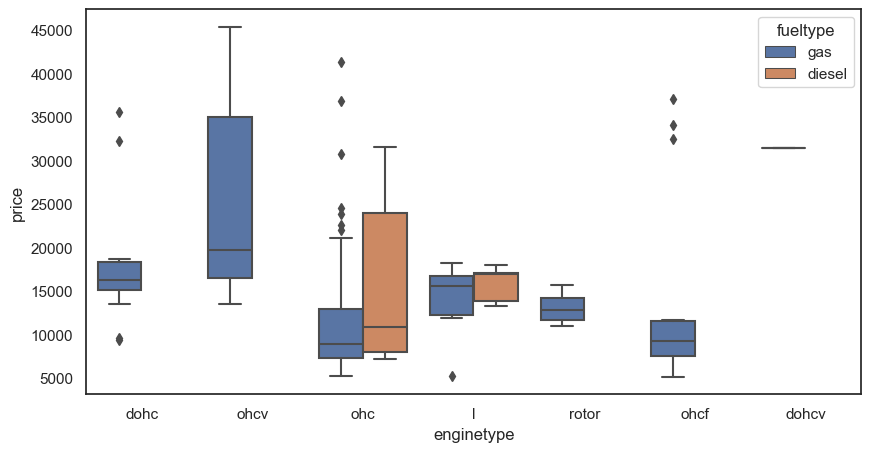

In [222]:
plt.figure(figsize=(10,5))
sns.boxplot(x='enginetype', y='price', hue = 'fueltype', data=car_data)
plt.show()

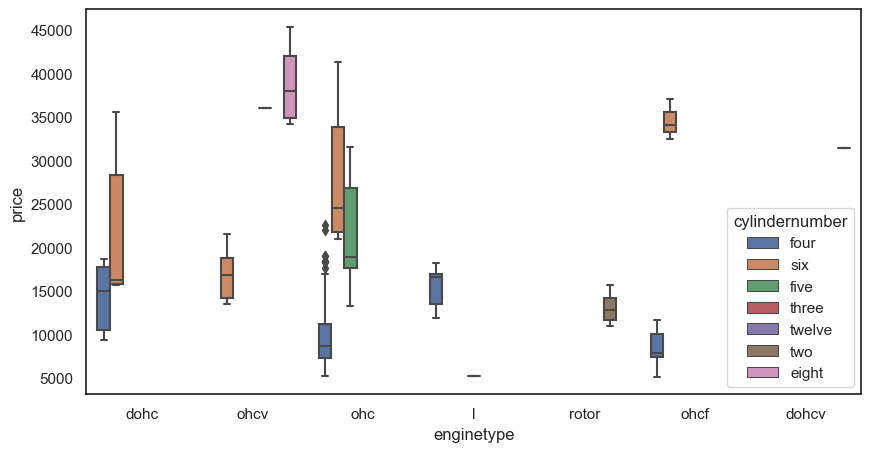

In [223]:
plt.figure(figsize=(10,5))
sns.boxplot(x='enginetype', y='price', hue = 'cylindernumber', data=car_data)
plt.show()

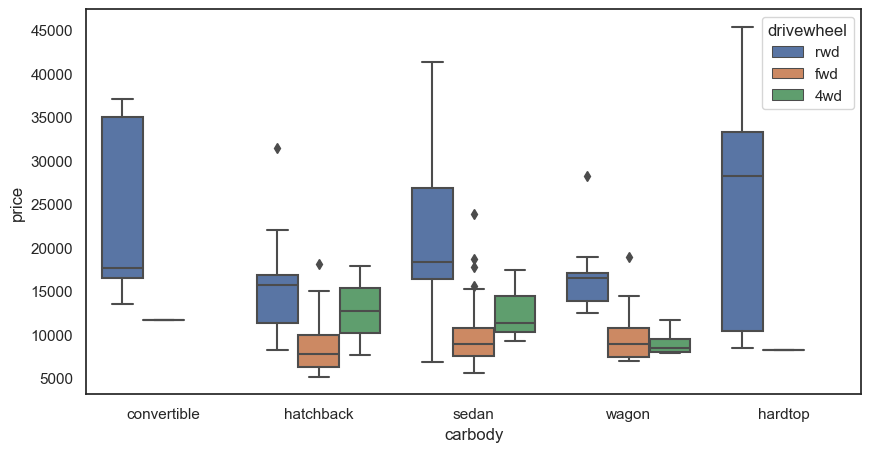

In [224]:
plt.figure(figsize=(10,5))
sns.boxplot(x='carbody', y='price', hue = 'drivewheel', data=car_data)
plt.show()

<b>Step 3.2: Visualising Continuous Variables (Numeric Data)</b>

In [225]:
##Numeric Variables
car_data_numeric = pd.DataFrame(car_data.dtypes.loc[~(car_data.dtypes=='object')])
car_data_numeric.reset_index(inplace=True)
car_data_numeric= car_data_numeric.rename(columns={'index':'numeric_cols'})
car_data_numeric.numeric_cols.unique()

array(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype=object)

In [226]:
##Retaining only the numberic/continuous variables of our use
numeric_variables = car_data.loc[:,list(car_data_numeric.numeric_cols)]
#Dataframe containing only the continuous variables
numeric_variables.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [227]:
def plot_dist(var_list):
    #Function to plot the distribution plot of the numeric variable list
    plt.figure(figsize=(20, 15))
    for var in var_list:
        plt.subplot(3,5,var_list.index(var)+1)
        # sns.histplot(data=car_data, x=var, kde=True)
        sns.distplot(car_data[var], kde=True)
    plt.show()

['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


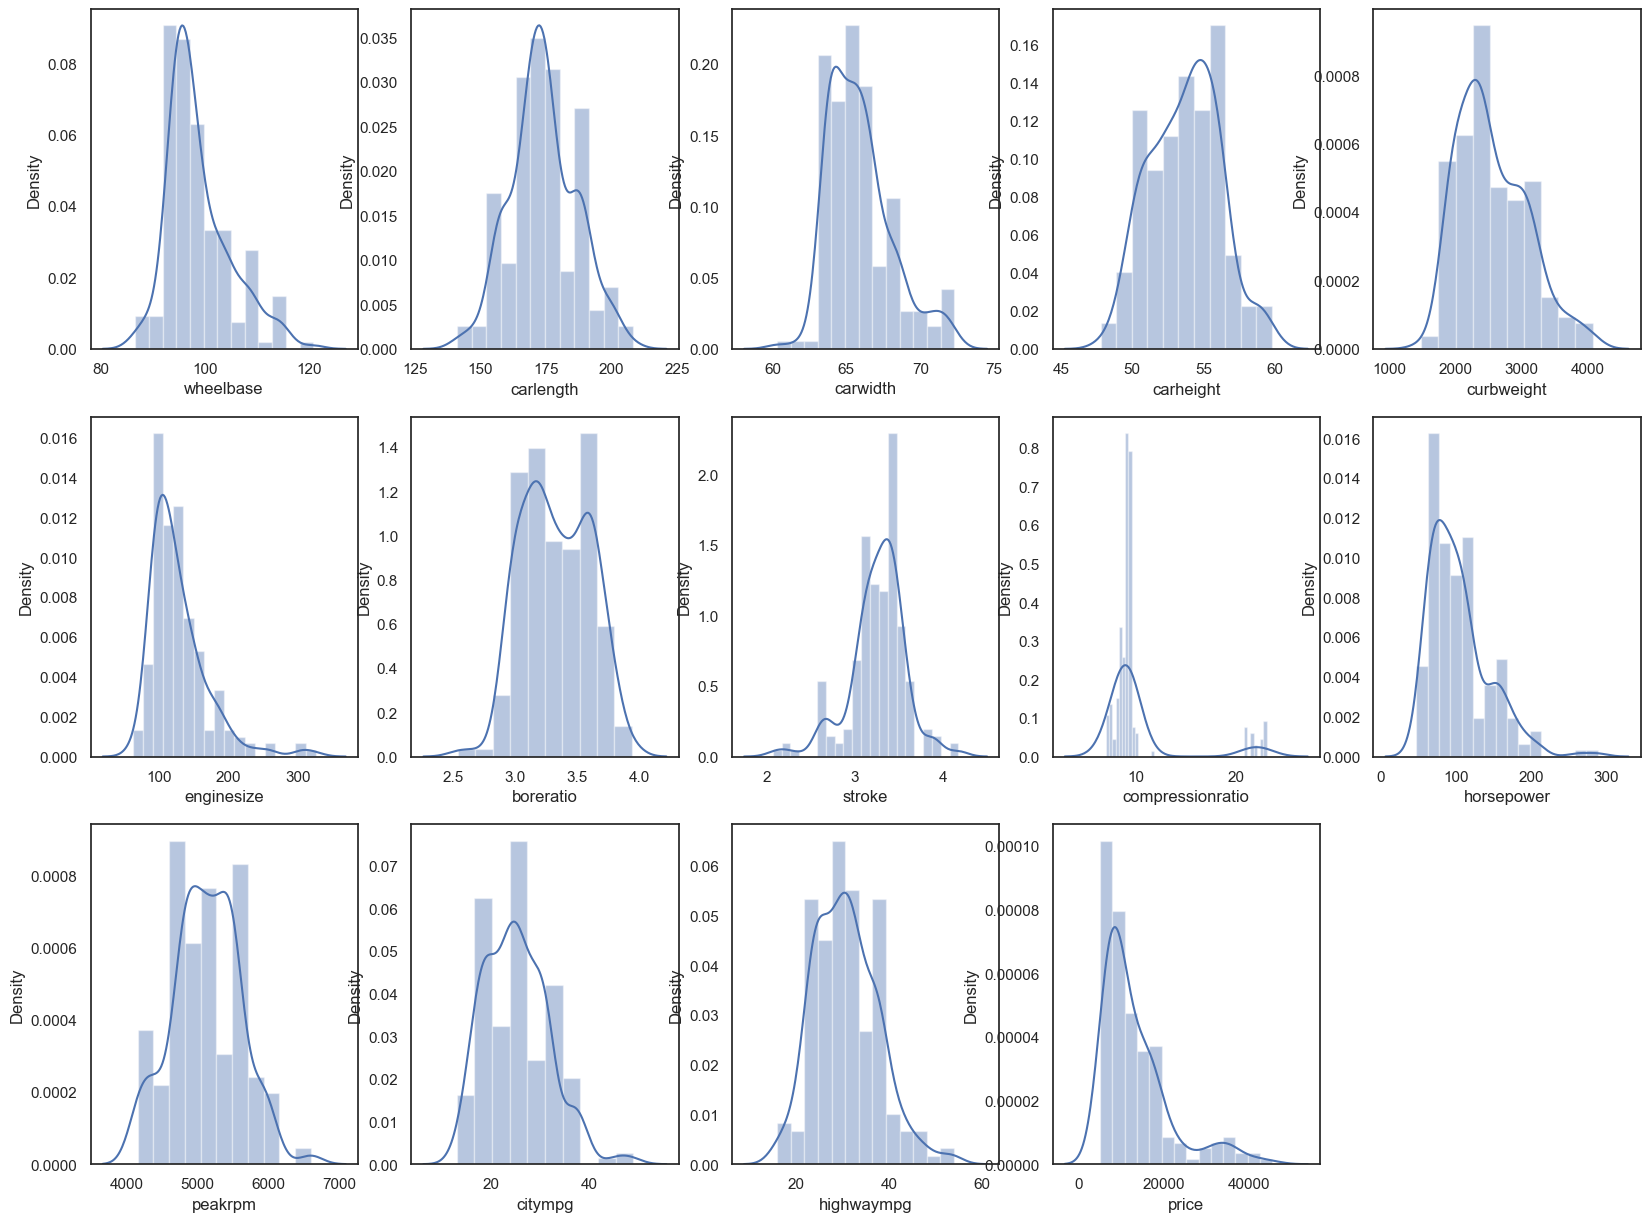

In [228]:
numeric_variables_cols = list(numeric_variables.columns)
print(numeric_variables_cols)
plot_dist(numeric_variables_cols)

We see enginesize, horsepower and compression ratio variables to have a right skewed distribution, this is probably due to outliers in the variable.

In [229]:
print(car_data[['horsepower','curbweight','enginesize']].quantile([0.01, .96]))
print(car_data[['compressionratio']].quantile([0.01, .90]))

      horsepower  curbweight  enginesize
0.01       52.12     1819.72        70.0
0.96      182.00     3657.80       209.0
      compressionratio
0.01              7.00
0.90             10.94


We decide to treat the outliers by clipping the variables curbweight','horsepower','enginesize' at 96 precentile value. And clip compressionratio at 90 percentile value

In [230]:
# Outilers in price of cars
car_data['horsepower'][np.abs(car_data['horsepower'] > 182.00)]= 182.00
car_data['curbweight'][np.abs(car_data['curbweight'] > 3657.80)]= 3657.80
car_data['enginesize'][np.abs(car_data['enginesize'] > 209.00)]= 209.00
car_data['compressionratio'][np.abs(car_data['compressionratio'] > 10.94)]= 10.94

Lets keep car data for which the price is less than 3 standard deviation.

In [231]:
car_data = car_data[np.abs(car_data.price-car_data.price.mean()) <= (3*car_data.price.std())]

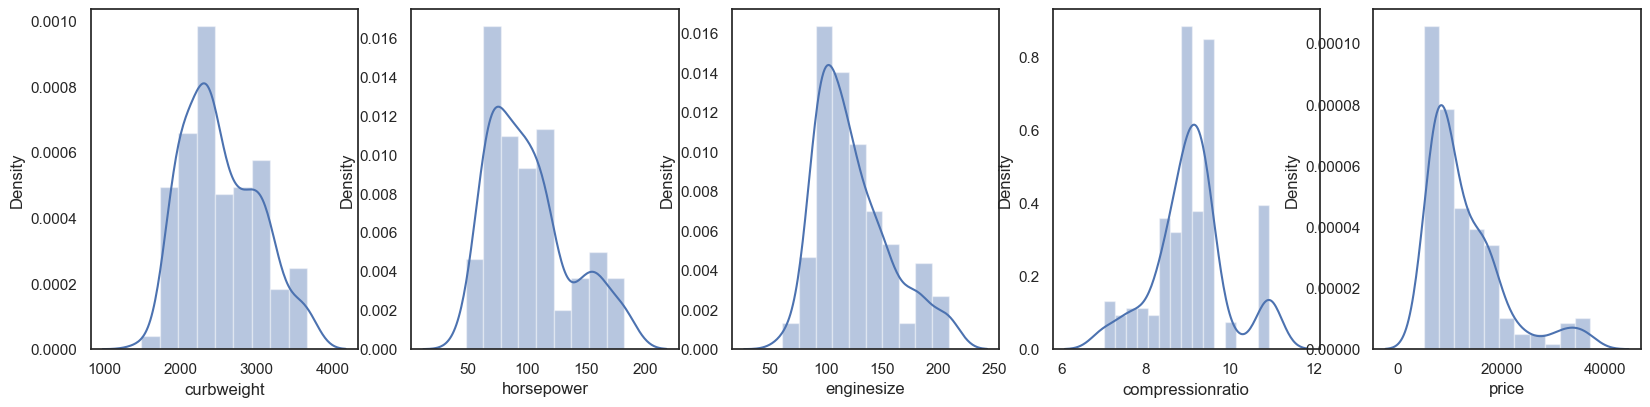

In [232]:
plot_dist(['curbweight','horsepower','enginesize','compressionratio','price'])

### Step 4: Deriving New Features
This will be helpful to remove corelated variables.

Earlier, from the scatter plot and the heatmap, we noticed there is a high correlation between carlength, wheelbase, car width, car weight and city/highway mpg's. Lets create new variables from these to try reducing the multicolinearlity.

In [233]:
car_data['carLWratio'] = car_data.carlength/car_data.carwidth
car_data['carWHratio'] = car_data.carwidth/car_data.carheight
car_data['PWratio'] = car_data.horsepower/car_data.curbweight
car_data['HCmpgratio'] = car_data.highwaympg/car_data.citympg
car_data.drop(['carlength','carwidth','carheight','highwaympg','citympg'],axis=1,inplace=True)

Since we saw that the company brand value also is determinig the pricing of the car. Let's create a company_segment categorical variable which would suggest, under which segment tier does the car_company comes under.<br>
We will segment the car companies based on the mean company price as
-  __economical__ if company mean price is below 10,000
-  __midprice__ if company mean price is above 10,000 and below 20,000
-  __premium__ if company mean price is above 20,000

In [234]:
car_data.groupby('car_company').price.mean().sort_values(ascending=False)

car_company
jaguar         34600.000000
porsche        31400.500000
buick          30469.333333
bmw            23947.857143
volvo          18063.181818
audi           17859.166714
mercury        16503.000000
alfa-romero    15498.333333
peugeot        15489.090909
saab           15223.333333
mazda          10652.882353
nissan         10415.666667
volkswagen     10077.500000
toyota          9885.812500
renault         9595.000000
mitsubishi      9239.769231
isuzu           8916.500000
subaru          8541.250000
honda           8184.692308
plymouth        7963.428571
dodge           7875.444444
chevrolet       6007.000000
Name: price, dtype: float64

In [235]:
##Creating an avg_carprice dataframe and deriving new segments of car 'price_range'
avg_carprice = car_data.groupby('car_company')['price'].mean().round(2).to_frame('avg_carprice')
avg_carprice.reset_index(inplace=True)
avg_carprice

,car_company,avg_carprice
0,alfa-romero,15498.33
1,audi,17859.17
2,bmw,23947.86
3,buick,30469.33
4,chevrolet,6007.00
5,dodge,7875.44
6,honda,8184.69
7,isuzu,8916.50
8,jaguar,34600.00
9,mazda,10652.88


In [236]:
##Deriving new segments 'economical','midprice' and 'premium' based on average price of cars within a company
avg_carprice['price_range'] = ""
avg_carprice.loc[((avg_carprice.avg_carprice>0) & (avg_carprice.avg_carprice<10000)),['price_range']] ='economical'
avg_carprice.loc[((avg_carprice.avg_carprice>=10000) & (avg_carprice.avg_carprice<20000)),['price_range']] ='midprice'
avg_carprice.loc[(avg_carprice.avg_carprice>=20000),['price_range']] ='premium'
avg_carprice = avg_carprice.drop('avg_carprice',axis=1)
avg_carprice

,car_company,price_range
0,alfa-romero,midprice
1,audi,midprice
2,bmw,premium
3,buick,premium
4,chevrolet,economical
5,dodge,economical
6,honda,economical
7,isuzu,economical
8,jaguar,premium
9,mazda,midprice


In [237]:
##Merging 'df_carprice' and 'avg_carprice' to get the derived column 'price_range' and dropping off 'avg_carprice' column
car_data = pd.merge(car_data, avg_carprice, how='left', on='car_company')
# Dropping the orignal car_company variable
car_data.drop('car_company',axis=1,inplace=True)
car_data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,curbweight,enginetype,...,stroke,compressionratio,horsepower,peakrpm,price,carLWratio,carWHratio,PWratio,HCmpgratio,price_range
0,risky,gas,std,two,convertible,rwd,front,88.6,2548.0,dohc,...,2.68,9.0,111,5000,13495.0,2.633385,1.313525,0.043564,1.285714,midprice
1,risky,gas,std,two,convertible,rwd,front,88.6,2548.0,dohc,...,2.68,9.0,111,5000,16500.0,2.633385,1.313525,0.043564,1.285714,midprice
2,moderate,gas,std,two,hatchback,rwd,front,94.5,2823.0,ohcv,...,3.47,9.0,154,5000,16500.0,2.613740,1.250000,0.054552,1.368421,midprice
3,risky,gas,std,four,sedan,fwd,front,99.8,2337.0,ohc,...,3.40,10.0,102,5500,13950.0,2.667674,1.219153,0.043646,1.250000,midprice
4,risky,gas,std,four,sedan,4wd,front,99.4,2824.0,ohc,...,3.40,8.0,115,5500,17450.0,2.659639,1.222836,0.040722,1.222222,midprice


In [238]:
car_data.shape

(202, 24)

In [239]:
car_data.groupby('price_range').price.mean()

price_range
economical     8893.252632
midprice      13231.839151
premium       29107.309524
Name: price, dtype: float64

#### Average Car Price vs Type of Drivewheel Analysis

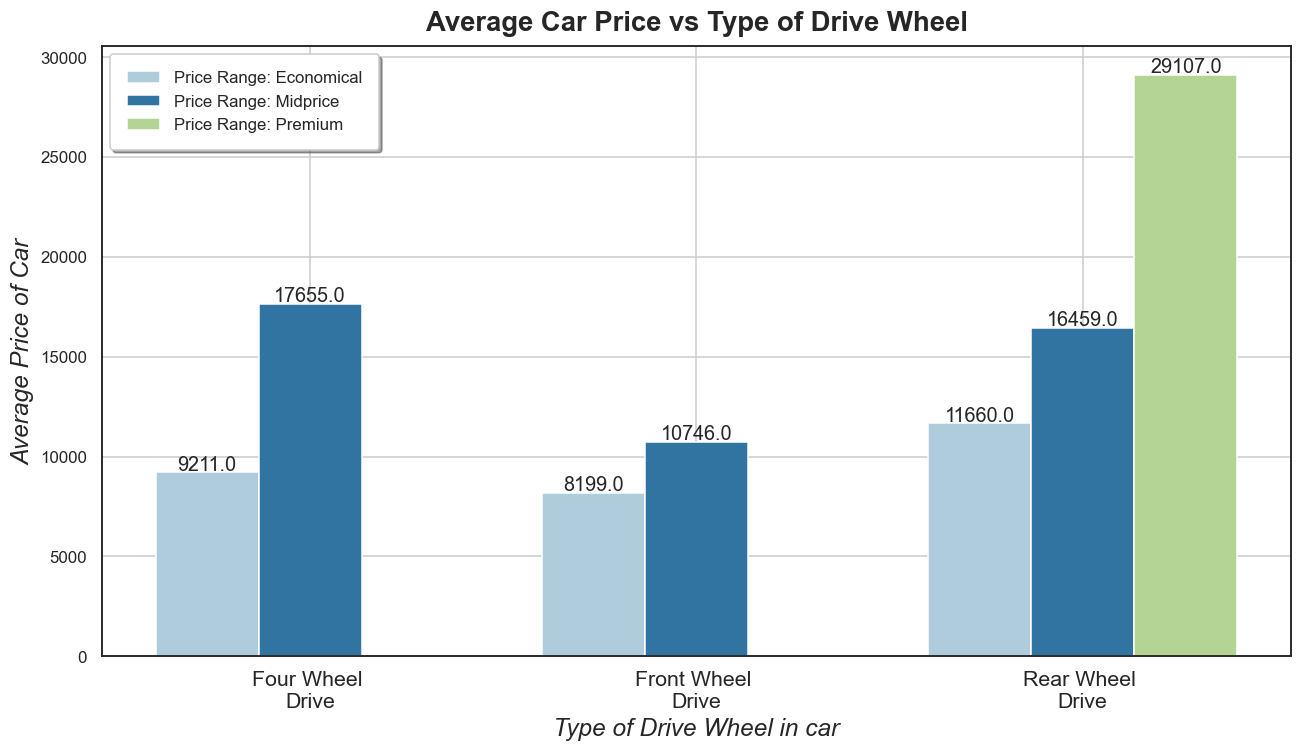

In [240]:
##Type of drivewheel in car and average car price (hue=price_range)
sns.set(style='white')
plt.figure(figsize=(12,7), dpi=110)
drv = car_data.groupby(['drivewheel','price_range'])['price'].mean().round(0).to_frame('avg_price')
drv.reset_index(inplace=True)

ax_E1 = sns.barplot(x=drv.drivewheel, y=drv.avg_price, hue=drv.price_range, palette='Paired')
plt.xlabel('Type of Drive Wheel in car', fontsize= 16, fontstyle='italic')
plt.xticks(range(0,3),['Four Wheel \nDrive','Front Wheel \nDrive','Rear Wheel \nDrive'], fontsize=14)
plt.ylabel('Average Price of Car', fontsize= 16, fontstyle='italic')
plt.title('Average Car Price vs Type of Drive Wheel',fontsize= 18, fontweight='bold', pad=10)

#Legend for the plot
M2= ax_E1.legend(loc='upper left', bbox_to_anchor=(0,1), framealpha=1, shadow=True, borderpad=1, fancybox=True)
M2.get_texts()[0].set_text('Price Range: Economical')
M2.get_texts()[1].set_text('Price Range: Midprice')
M2.get_texts()[2].set_text('Price Range: Premium')


#Display values
for i in ax_E1.patches:
    ax_E1.annotate(format(i.get_height()), (i.get_x() + i.get_width() / 2.,\
                                                i.get_height()), ha = 'center', fontsize=13, \
                   va = 'center', xytext = (0,5), textcoords = 'offset points', rotation=0)
plt.grid(True)
plt.tight_layout()
plt.autoscale()
plt.show()

**Analysis:**
The `'premium'` range cars prefer `rwd (rear wheel drive)`

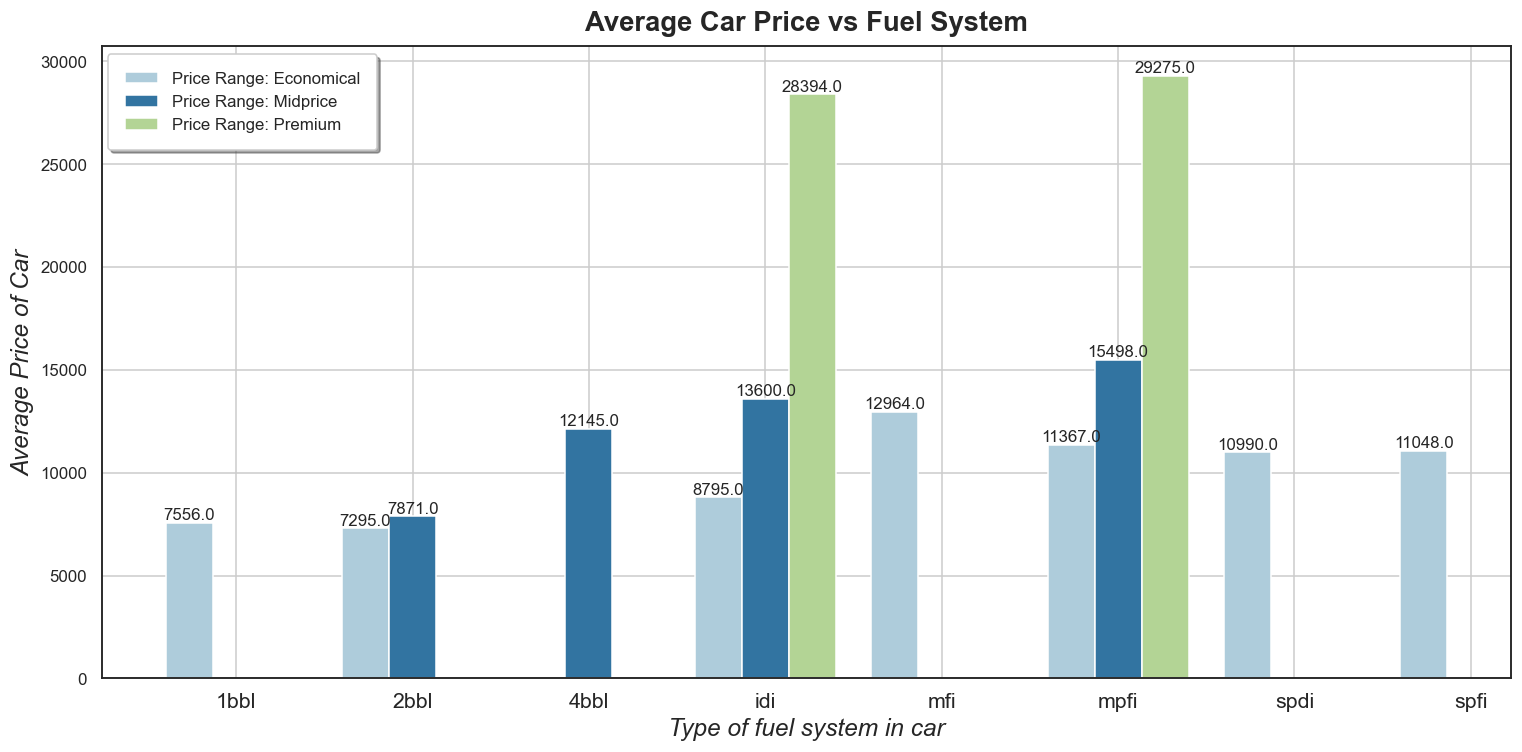

In [241]:
##Type of fuel system and average car price (hue='price_range')
sns.set(style='white')
plt.figure(figsize=(14,7), dpi=110)
fuel = car_data.groupby(['fuelsystem','price_range'])['price'].mean().round(0).to_frame('avg_price')
fuel.reset_index(inplace=True)

ax_F1 = sns.barplot(x=fuel.fuelsystem, y=fuel.avg_price, hue=fuel.price_range, palette='Paired')
plt.xlabel('Type of fuel system in car', fontsize= 16, fontstyle='italic')
plt.xticks(fontsize=14)
plt.ylabel('Average Price of Car', fontsize= 16, fontstyle='italic')
plt.title('Average Car Price vs Fuel System',fontsize= 18, fontweight='bold', pad=10)

#Legend for the plot
M1= ax_F1.legend(loc='upper center', bbox_to_anchor=(0.1,1), framealpha=1, shadow=True, borderpad=1, fancybox=True)
M1.get_texts()[0].set_text('Price Range: Economical')
M1.get_texts()[1].set_text('Price Range: Midprice')
M1.get_texts()[2].set_text('Price Range: Premium')


#Display values
for i in ax_F1.patches:
    ax_F1.annotate(format(i.get_height()), (i.get_x() + i.get_width() / 2.,\
                                                i.get_height()), ha = 'center', fontsize=11, \
                   va = 'center', xytext = (0,5), textcoords = 'offset points', rotation=0)
plt.grid(True)
plt.tight_layout()
plt.autoscale()
plt.show()

**Analysis:**
The`'premium'` range cars prefer `idi` and `mpfi` fuel system.

In [242]:
##Checking the numeric dtypes (float64 and int64)
car_data.select_dtypes(include=['float64','int64']).columns

Index(['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'price', 'carLWratio',
       'carWHratio', 'PWratio', 'HCmpgratio'],
      dtype='object')

In [243]:
##Checking the object dtypes (object)
car_data.select_dtypes(include=['object']).columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem', 'price_range'],
      dtype='object')

In [244]:
car_data.shape

(202, 24)

In [245]:
##numeric variables
numeric_vars = car_data.select_dtypes(include=['int64','float64']).columns
numeric_vars

Index(['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'price', 'carLWratio',
       'carWHratio', 'PWratio', 'HCmpgratio'],
      dtype='object')

In [246]:
##categorical variables
cat_vars = car_data.select_dtypes(include=['object']).columns
cat_vars

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem', 'price_range'],
      dtype='object')

### Step 5: Dummy Variables

In [247]:
##Defining a function for categorical variables with binary values.
def binary_cat_vars(df, list_new):
    for i in list_new:
        if len(set(df[i]))==2:
            print('Categorical variable with binary values: ',i,'\nUnique Values in ',i,':',set(df[i]),"\n")

cat_list_new = list(cat_vars)
binary_cat_vars(df=car_data, list_new= cat_list_new)

Categorical variable with binary values:  fueltype 
Unique Values in  fueltype : {'gas', 'diesel'} 

Categorical variable with binary values:  aspiration 
Unique Values in  aspiration : {'std', 'turbo'} 

Categorical variable with binary values:  doornumber 
Unique Values in  doornumber : {'two', 'four'} 

Categorical variable with binary values:  enginelocation 
Unique Values in  enginelocation : {'rear', 'front'} 



In [248]:
##Mapping binary values, '0' and '1' to the binary category variables
car_data['enginelocation'] = car_data['enginelocation'].map({'rear': 1, 'front': 0})
car_data['doornumber'] = car_data['doornumber'].map({'four': 1, 'two': 0})
car_data['aspiration'] = car_data['aspiration'].map({'std': 1, 'turbo': 0})
car_data['fueltype'] = car_data['fueltype'].map({'gas': 1, 'diesel': 0})

In [249]:
car_data.shape

(202, 24)

In [250]:
car_data.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'price', 'carLWratio',
       'carWHratio', 'PWratio', 'HCmpgratio', 'price_range'],
      dtype='object')

In [251]:
##Using get_dummies for other categorical variables. 'carp' is the new dataframe with all the variables including dummy variables.
df = pd.get_dummies(car_data)
df.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,...,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,price_range_economical,price_range_midprice,price_range_premium
0,1,1,0,0,88.6,2548.0,130,3.47,2.68,9.0,...,0,0,0,0,1,0,0,0,1,0
1,1,1,0,0,88.6,2548.0,130,3.47,2.68,9.0,...,0,0,0,0,1,0,0,0,1,0
2,1,1,0,0,94.5,2823.0,152,2.68,3.47,9.0,...,0,0,0,0,1,0,0,0,1,0
3,1,1,1,0,99.8,2337.0,109,3.19,3.40,10.0,...,0,0,0,0,1,0,0,0,1,0
4,1,1,1,0,99.4,2824.0,136,3.19,3.40,8.0,...,0,0,0,0,1,0,0,0,1,0


In [252]:
df.shape

(202, 53)

In [253]:
#checking column names for dummy variables
df.columns

Index(['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'wheelbase',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'price', 'carLWratio', 'carWHratio', 'PWratio',
       'HCmpgratio', 'symboling_moderate', 'symboling_risky', 'symboling_safe',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_eight', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two', 'fuelsystem_1bbl',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi', 'price_range_econom

In [254]:
# Droping 1 dummy variable and Keeping n-1 varaibles for each feature
df.drop(['symboling_risky',
         'carbody_hatchback',
         'drivewheel_4wd',
         'enginetype_l',
         'cylindernumber_three',
         'fuelsystem_1bbl',
         'price_range_economical'],axis=1,inplace=True)
df.columns
print(df.shape)

(202, 46)


## Step 6: Splitting the Data into Train and Test sets

#### Test Train Split

In [255]:
# Splitting the avilable data into training and testing set.

df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 8)

#### Feature scaling

In [256]:
# Using MinMaxScaler to scale all the numeric variables in the same scale between 0 and 1.
scaler = MinMaxScaler()

In [257]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['horsepower','wheelbase','curbweight', 'enginesize', 'boreratio','carLWratio','carWHratio','PWratio','HCmpgratio','stroke','compressionratio','peakrpm','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.transform(df_test[num_vars])

### Dividing into X and Y sets for the model building

In [258]:
y_train = df_train.pop('price')
X_train = df_train

In [259]:
num_vars = ['horsepower', 'wheelbase', 'curbweight', 'enginesize', 'boreratio', 'carLWratio', 'carWHratio',
                       'PWratio', 'HCmpgratio', 'stroke', 'compressionratio', 'peakrpm', 'price']

#### Dividing into X_test and y_test
y_test = df_test.pop('price')
X_test = df_test

### Data Visualization Using t-sne

In [260]:
# This function displays a 3d tsne for the given data samples with there files names
# which helps in observing the data to understand the efficiency of the models and
# the samples that the models fail to predict good
def display_3d_tsne(data):
    tsne = TSNE(n_components=3, random_state=0)

    projections = tsne.fit_transform(data.values, )

    fig = px.scatter_3d(projections, x=0, y=1, z=2)

    fig.update_traces(marker_size=6)

    fig.show()

# This function displays a 2d tsne for the given data samples with there files names
# which helps in observing the data to understand the efficiency of the models and
# # the samples that the models fail to predict good
def display_2d_tsne(data):
    tsne = TSNE(n_components=2, random_state=0)
    projections = tsne.fit_transform(data.values)

    fig = px.scatter(projections, x=0, y=1)

    fig.update_traces(marker_size=6)
    fig.show()

print("X_train t-sne (3d)")
display_3d_tsne(X_train)
print("X_train t-sne (2d)")
display_2d_tsne(X_train)

print("X_test t-sne (3d)")
display_3d_tsne(X_test)
print("X_test t-sne (2d)")
display_2d_tsne(X_test)

X_train t-sne (3d)


X_train t-sne (2d)


X_test t-sne (3d)


X_test t-sne (2d)


### Predictions Comparison Plots

In [261]:
def plot_y_true_pred_spread(y_test, y_pred):
    # Plotting y_test and y_pred to understand the spread.
    fig = plt.figure()
    plt.scatter(y_test,y_pred)
    fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading
    plt.xlabel('y_test', fontsize=18)                          # X-label
    plt.ylabel('y_pred', fontsize=16)                          # Y-label

def plot_y_true_pred_continues(y_test, y_pred):
    # Actual vs Predicted (Test Set)
    plt.figure(figsize = (8,3), dpi=120)
    p = [i for i in range(0, y_test.shape[0],1)] #As test set has 60 observations
    l = [i for i in range(0,y_pred.shape[0],1)]
    plt.plot(p, y_pred, color="blue", linewidth=1, linestyle="-", label="y_pred")   #Predicted 'y_pred' plot(test pred)
    plt.plot(l, y_test, color="red",  linewidth=1, linestyle="-", label="y_test")   #Actual 'y_test' plot
    plt.title('Actual (y_test) vs Predicted (y_pred)', fontsize=15, fontweight='bold')
    plt.ylabel('Car Price', fontsize=15, fontstyle='italic')
    plt.xlabel('Car Index (test set)', fontsize=15, fontstyle='italic')
    plt.legend(loc='best')
    plt.show()

### Scores Functions

In [262]:
def print_model_scores(y_true, y_pred):

    MAE_value = mean_absolute_error(y_true, y_pred)
    MSE_value = mean_squared_error(y_true, y_pred)
    RMSE_value = np.sqrt(mean_squared_error(y_true, y_pred))
    R2_value = r2_score(y_true, y_pred)
    Huber_value = huber_loss(y_true, y_pred, delta=0.5)

    print(f"MAE: {MAE_value}\nMSE: {MSE_value}\nRMSE: {RMSE_value}\nHuber_loss: {Huber_value}\nR2_score: {R2_value}")

def huber_loss(y_true, y_pred, delta):
    residual = y_true - y_pred
    condition = np.abs(residual) < delta
    squared_loss = 0.5 * residual ** 2
    linear_loss = delta * (np.abs(residual) - 0.5 * delta)
    loss = np.where(condition, squared_loss, linear_loss)
    return np.mean(loss)

### Linear Regression

MAE: 0.033459708771882965
MSE: 0.0020724937893871623
RMSE: 0.045524650348873215
Huber_loss: 0.0010362468946935812
R2_score: 0.9346902985732762


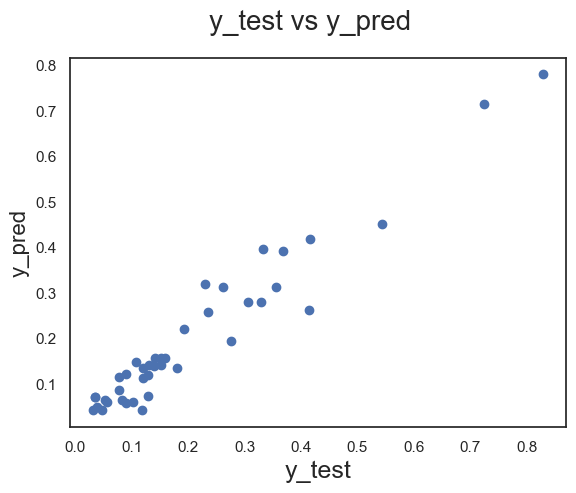

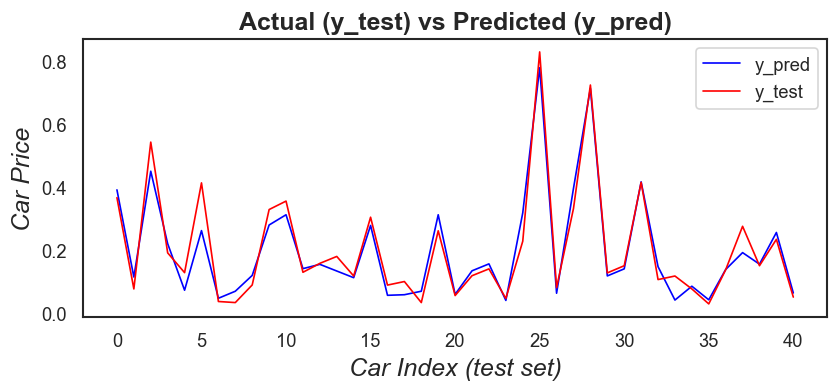

In [263]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
y_pred = linear_regression.predict(X_test)

print_model_scores(y_test, y_pred)
plot_y_true_pred_spread(y_test, y_pred)
plot_y_true_pred_continues(y_test, y_pred)

### Polynomial Regression

MAE: 4563354.482175779
MSE: 67999619051079.52
RMSE: 8246188.152781837
Huber_loss: 2281677.118796282
R2_score: -2142845899031706.5


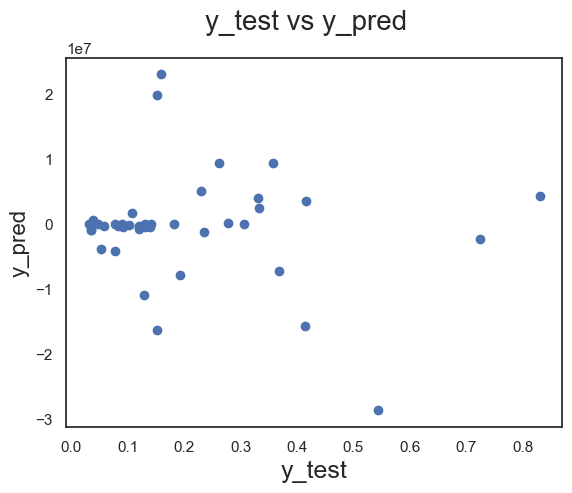

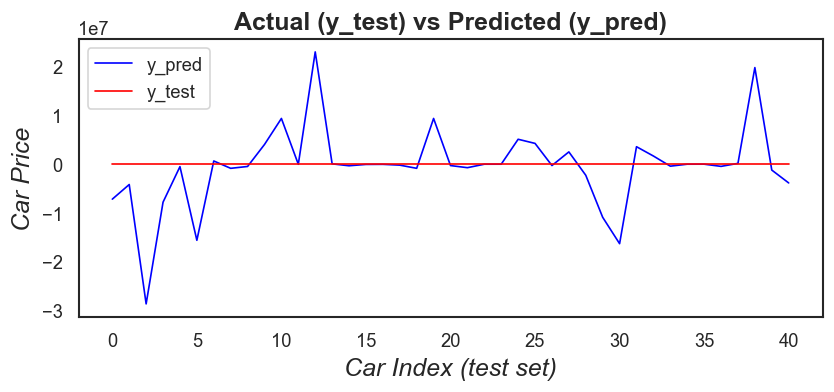

In [264]:
ploy_features_generator = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly_features = ploy_features_generator.fit_transform(X_train.values)
X_test_poly_features = ploy_features_generator.fit_transform(X_test.values)

linear_regression = LinearRegression()
linear_regression.fit(X_train_poly_features, y_train.values)
y_pred = linear_regression.predict(X_test_poly_features)

print_model_scores(y_test, y_pred)
plot_y_true_pred_spread(y_test, y_pred)
plot_y_true_pred_continues(y_test, y_pred)

### Neural Network

MAE: 0.04837314013761281
MSE: 0.003759118451776062
RMSE: 0.06131165021246828
Huber_loss: 0.001879559225888031
R2_score: 0.8815403428611579


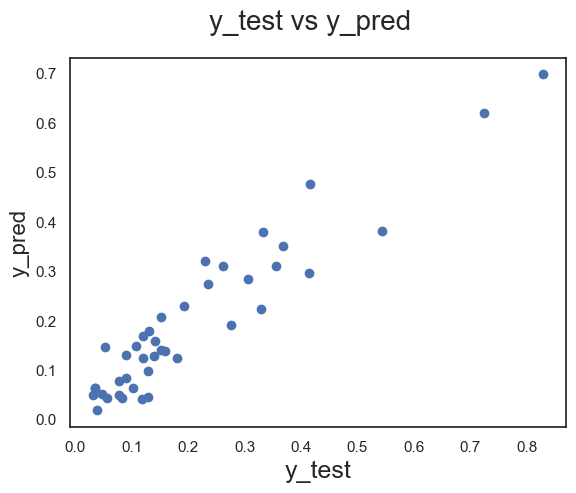

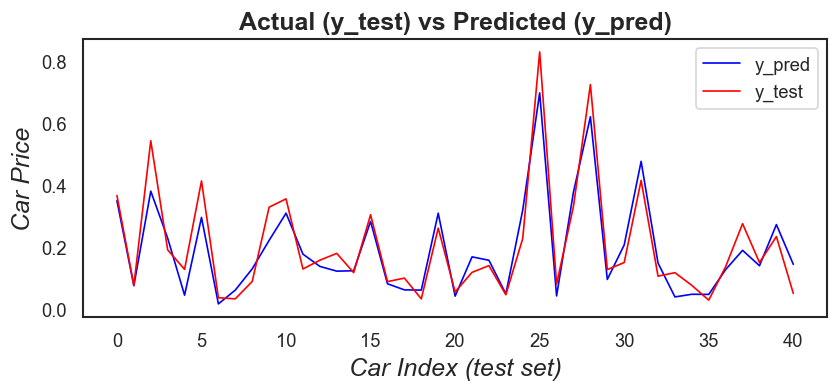

In [265]:
mlp = MLPRegressor(learning_rate='constant',hidden_layer_sizes=(100,250,100,50), alpha=0.05, activation='relu', solver='adam', max_iter=2000, random_state=4)
mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)

print_model_scores(y_test, y_pred)
plot_y_true_pred_spread(y_test, y_pred)
plot_y_true_pred_continues(y_test, y_pred)

### XGBoost

MAE: 0.041680740674219736
MSE: 0.0033543385486936076
RMSE: 0.05791665173931939
Huber_loss: 0.0016771692743468038
R2_score: 0.8942960166051407


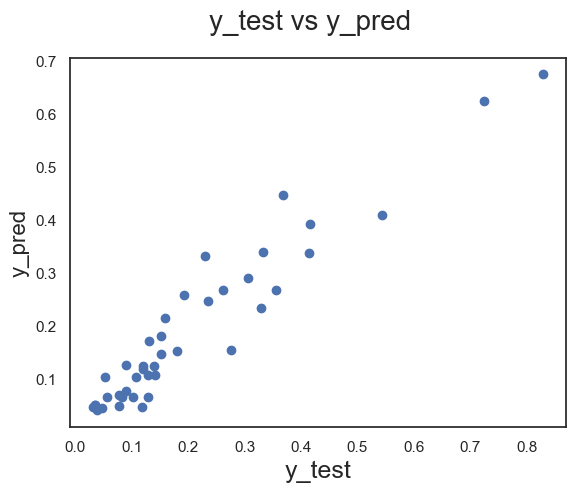

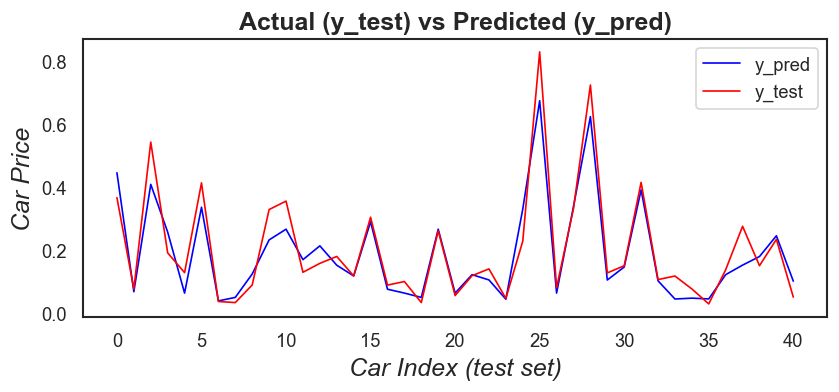

In [266]:
xg_reg = xgb.XGBRegressor(max_depth=6, objective='reg:squarederror', random_state=1)
xg_reg.fit(X_train, y_train)
y_pred = xg_reg.predict(X_test)

print_model_scores(y_test, y_pred)
plot_y_true_pred_spread(y_test, y_pred)
plot_y_true_pred_continues(y_test, y_pred)

### Random Forest

MAE: 0.04641398760544678
MSE: 0.004342179279786282
RMSE: 0.06589521439214142
Huber_loss: 0.002171089639893141
R2_score: 0.8631665707485641


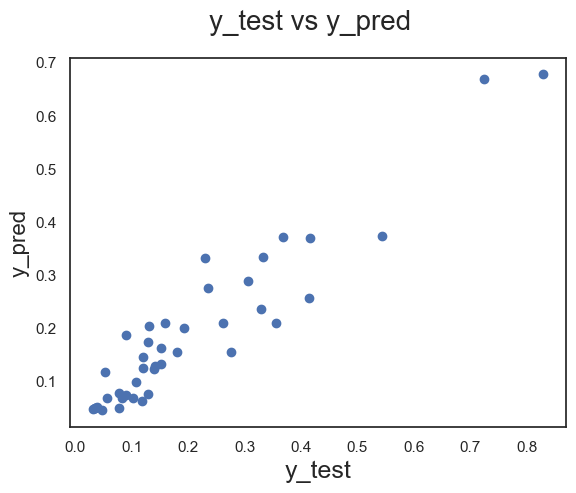

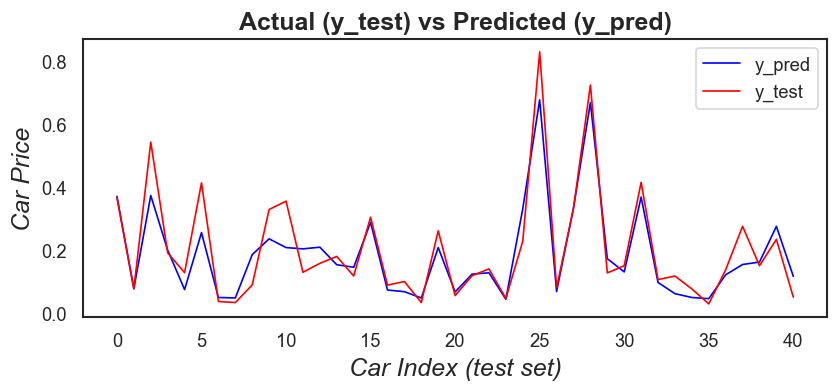

In [267]:
rfc = RandomForestRegressor(n_estimators=700, max_features='auto', random_state=4)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

print_model_scores(y_test, y_pred)
plot_y_true_pred_spread(y_test, y_pred)
plot_y_true_pred_continues(y_test, y_pred)

### Decision Tree Regression

MAE: 0.05859887947046189
MSE: 0.007669576130975083
RMSE: 0.08757611621312676
Huber_loss: 0.0038347880654875416
R2_score: 0.7583115907277936


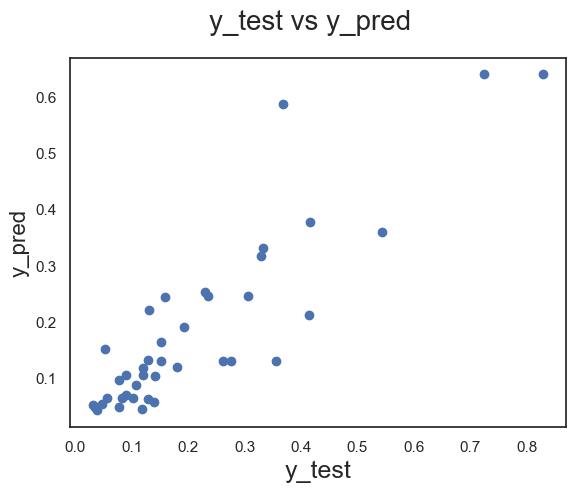

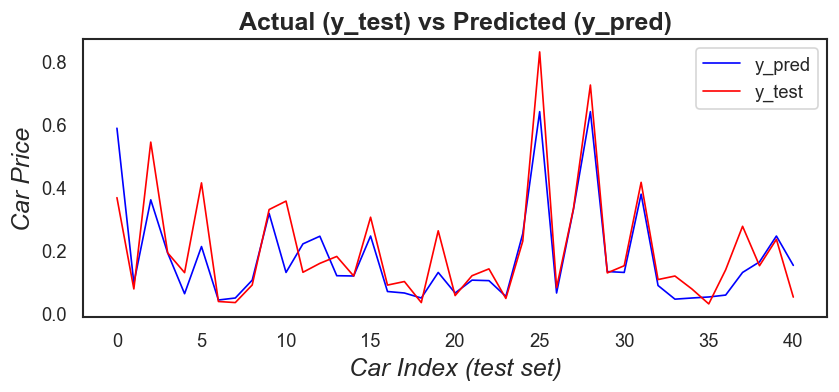

In [268]:
tree_regressor = DecisionTreeRegressor(max_depth=15, random_state=7)
tree_regressor.fit(X_train, y_train)
y_pred = tree_regressor.predict(X_test)

print_model_scores(y_test, y_pred)
plot_y_true_pred_spread(y_test, y_pred)
plot_y_true_pred_continues(y_test, y_pred)